# Heart Attack Analysis & Prediction

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning ML Modelling

# Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.

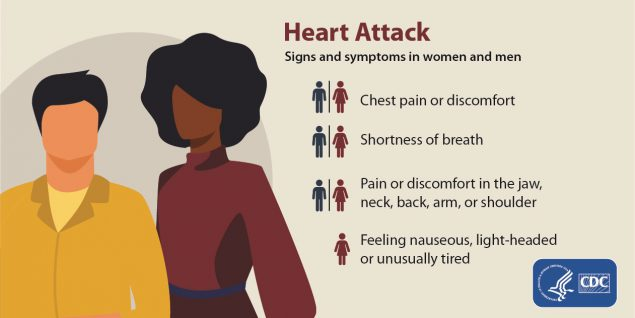

# Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Missing Value Analysis](#4)
5. [Unique Value Analysis](#5)
6. [Categorical Feature Analysis](#6)
7. [Numeric Feature Analysis](#7)
8. [Standardization](#8)
9. [Box Plot Analysis](#9)
10.[Swarm Plot Analysis](#10)
11.[Cat Plot Analysis](#11)
12.[Correlation Analysis](#12)
13.[Outlier Detection](#13)

<a id="1"></a>
## Python Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="2"></a>
## Data Content
* Age: Age of the patient
* Sex: Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp: Chest Pain type chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
* trtbps: resting blood pressure (in mm Hg)
* chol: cholestoral in mg/dl fetched via BMI sensor
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg: resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* target: 0= less chance of heart attack 1= more chance of heart attack

<a id="3"></a>
## Read and Analyse Data
* In this section we read heart.cv

In [ ]:
# read data
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [ ]:
df.head()

In [ ]:
# describe basic statistics of data
df.describe()

In [ ]:
# information about data frame
df.info()

<a id="4"></a>
## Missing Value Analysis

In [ ]:
df.isnull().sum()
# there is not missing values

<a id="5"></a>
## Unique Value Analysis
* Analyzing the unique type of values in the data set

In [ ]:
for i in list(df.columns):
    print("{} -- {}".format(i,df[i].value_counts().shape[0]))

<a id="6"></a>
## Categorical Feature Analysis

In [ ]:
categorical_list=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    dims = (4,4)
    fig, ax = plt.subplots(figsize=dims)
    sns.countplot(x=i,data=df_categoric,hue="output",palette = "Set2",)
    plt.title(i)

<a id="7"></a>
## Numeric Feature Analysis

In [ ]:
numeric_list=["age","trtbps","chol","thalachh","oldpeak","output"]
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="output",diag_kind="kde")
plt.show()

<a id="8"></a>
## Standardization

In [ ]:
scaler=StandardScaler()
scaler


In [ ]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])
scaled_array

In [ ]:
pd.DataFrame(scaled_array).describe()

<a id="9"></a>
## Box Plot Analysis

In [ ]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy=pd.concat([df_dummy,df.loc[:,"output"]],axis=1)
df_dummy.head()

In [ ]:
data_melted=pd.melt(df_dummy,id_vars="output",var_name="features",value_name="value")
data_melted.head(20)

In [ ]:
### Box Plot
plt.figure()
sns.boxplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

<a id="10"></a>
## Swarm Plot Analysis

In [ ]:
### Swarm Plot
plt.figure()
sns.swarmplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis

In [ ]:
plt.figure(figsize=(4,5))
sns.catplot(x="exng",y="age",hue="output",col="sex",kind="swarm",data=df)
plt.show()

<a id="12"></a>
## Correlation Analysis

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=.6)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outlier can disrupt ML process

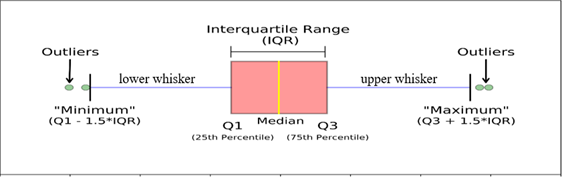

In [ ]:
numeric_list=["age","trtbps","chol","thalachh","oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

In [ ]:
for i in numeric_list:
    #IQR
    Q1=np.percentile(df.loc[:,i],25)
    Q3=np.percentile(df.loc[:,i],75)
    IQR=Q3-Q1
    print("Old Shape: ",df.loc[:,i].shape)
    
    #upper bound
    upper=np.where(df.loc[:,i]>=(Q3+2.5*IQR))
    #lower bound
    lower=np.where(df.loc[:,i]<=(Q1-2.5*IQR))
    
    print("{} --- {}".format(upper,lower))
    try:
        df.drop(upper[0],inplace=True)
        
    except: print("KeyError: {} not found in axis".format(upper[0]))
        
    try:   
        df.drop(lower[0],inplace=True)
    except: print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New Shape: ",df.shape)